As a reminder the objective of this study is to predict the `total claim amount` of a customer and study/investigate the impact of the factors (input features) on the target variable(`total claim amount`). That means in your exploratory data analysis, you have to look for patterns in this data that shows interesting relationships among the input features as well as with relation to the target feature.
- Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms.
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the input features. multicollinearity does not include the target feature.
- Plot the Correlation Heatmap.
- (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
sns.set_theme()

In [95]:
file = pd.read_csv("C:\\Users\\fprie\\OneDrive\\Dokumente\\GitHub\\IH_RH_DA_FT_OCT_2022\\Class_Materials\\Case_Studies\\Customer_Analysis_Case_Study\\Data\\Data_Marketing_Customer_Analysis_Round3.csv")

In [96]:
file

region  customer_lifetime_value response  coverage education  \
0          central                     4809       no     basic   college   
1      west region                     2228       no     basic   college   
2             east                    14947       no     basic  bachelor   
3       north west                    22332      yes  extended   college   
4       north west                     9025       no   premium  bachelor   
...            ...                      ...      ...       ...       ...   
10684      central                    15563       no   premium  bachelor   
10685   north west                     5259       no     basic   college   
10686      central                    23893       no  extended  bachelor   
10687  west region                    11971       no   premium   college   
10688      central                     6857       no     basic  bachelor   

      effective_to_date month employment_status gender  income  ...  \
0               2/18/11   feb          employed      m   48029  ...   
1               1/18/11   jan        unemployed      f   92260  ...   
2               2/10/11   feb          employed      m   22139  ...   
3               1/11/11   jan          employed      m   49078  ...   
4               1/17/11   jan     medical leave      f   23675  ...   
...                 ...   ...               ...    ...     ...  ...   
10684           1/19/11   jan        unemployed      f   61541  ...   
10685            1/6/11   jan          employed      f   61146  ...   
10686            2/6/11   feb          employed      f   39837  ...   
10687           2/13/11   feb          employed      f   64195  ...   
10688            1/8/11   jan        unemployed      m   68942  ...   

      months_since_policy_inception number_of_open_complaints  \
0                                52                         0   
1                                26                         0   
2                                31                         0   
3                                 3                         0   
4                                31                         0   
...                             ...                       ...   
10684                            40                         0   
10685                            68                         0   
10686                            63                         0   
10687                            27                         4   
10688                             1                         0   

       number_of_policies     policy_type        policy  renew_offer_type  \
0                       9  corporate auto  corporate l3            offer3   
1                       1   personal auto   personal l3            offer4   
2                       2   personal auto   personal l3            offer3   
3                       2  corporate auto  corporate l3            offer2   
4                       7   personal auto   personal l2            offer1   
...                   ...             ...           ...               ...   
10684                   7   personal auto   personal l1            offer3   
10685                   6   personal auto   personal l3            offer2   
10686                   2  corporate auto  corporate l3            offer1   
10687                   6   personal auto   personal l1            offer1   
10688                   3   personal auto   personal l1            offer4   

       sales_channel total_claim_amount  vehicle_class vehicle_size  
0              agent                292  four-door car      medsize  
1        call center                744  four-door car      medsize  
2        call center                480            suv      medsize  
3             branch                484  four-door car      medsize  
4             branch                707  four-door car      medsize  
...              ...                ...            ...          ...  
10684            web               1214     luxury

In [97]:
file.describe()

customer_lifetime_value        income  monthly_premium_auto  \
count             10689.000000  10689.000000          10689.000000   
mean               8011.906727  51750.243989             93.190196   
std                6877.557889  24778.053035             34.413111   
min                1898.000000  10037.000000             61.000000   
25%                4014.000000  29335.000000             68.000000   
50%                5776.000000  50398.000000             83.000000   
75%                8991.000000  72131.000000            109.000000   
max               83325.000000  99981.000000            298.000000   

       months_since_last_claim  months_since_policy_inception  \
count             10689.000000                   10689.000000   
mean                 15.144073                      48.100571   
std                  10.086110                      27.934300   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       number_of_open_complaints  number_of_policies  total_claim_amount  
count               10689.000000        10689.000000        10689.000000  
mean                    0.384975            2.980821          434.227243  
std                     0.910210            2.399497          292.550878  
min                     0.000000            1.000000            0.000000  
25%                     0.000000            1.000000          269.000000  
50%                     0.000000            2.000000          383.000000  
75%                     0.000000            4.000000          547.000000  
max                     5.000000            9.000000         2893.000000

In [98]:
numerical = file.iloc[:,[1,9,12,13,14,15,16,21]].reset_index(drop=True)
categorical = file.iloc[:,[0,2,3,4,5,6,7,8,10,11,17,18,19,20,22,23]].reset_index(drop=True)
cols = numerical.columns
cols.map(str)
print(cols)
length = (len(cols))

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')


Text(0.5, 1.0, 'total_claim_amount')

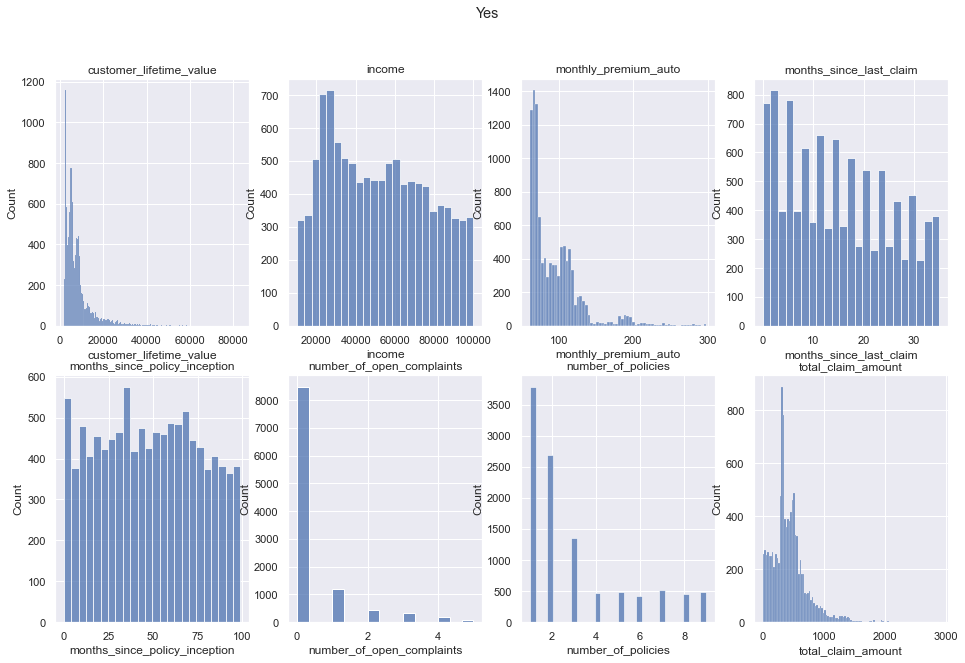

In [99]:
#initialize figure and axes
fig, axes = plt.subplots(2,4 ,figsize = (16,10))
fig.suptitle('Yes')
sns.histplot(ax=axes[0, 0], data=numerical, x="customer_lifetime_value")
sns.histplot(ax=axes[0, 1], data=numerical, x="income")
sns.histplot(ax=axes[0, 2], data=numerical, x="monthly_premium_auto")
sns.histplot(ax=axes[0, 3], data=numerical, x="months_since_last_claim")
sns.histplot(ax=axes[1, 0], data=numerical, x="months_since_policy_inception")
sns.histplot(ax=axes[1, 1], data=numerical, x="number_of_open_complaints")
sns.histplot(ax=axes[1, 2], data=numerical, x="number_of_policies")
sns.histplot(ax=axes[1, 3], data=numerical, x="total_claim_amount")

axes[0, 0].set_title("customer_lifetime_value")
axes[0, 1].set_title("income")
axes[0, 2].set_title("monthly_premium_auto")
axes[0, 3].set_title("months_since_last_claim")
axes[1, 0].set_title("months_since_policy_inception")
axes[1, 1].set_title("number_of_open_complaints")
axes[1, 2].set_title("number_of_policies")
axes[1, 3].set_title("total_claim_amount")

<AxesSubplot:>

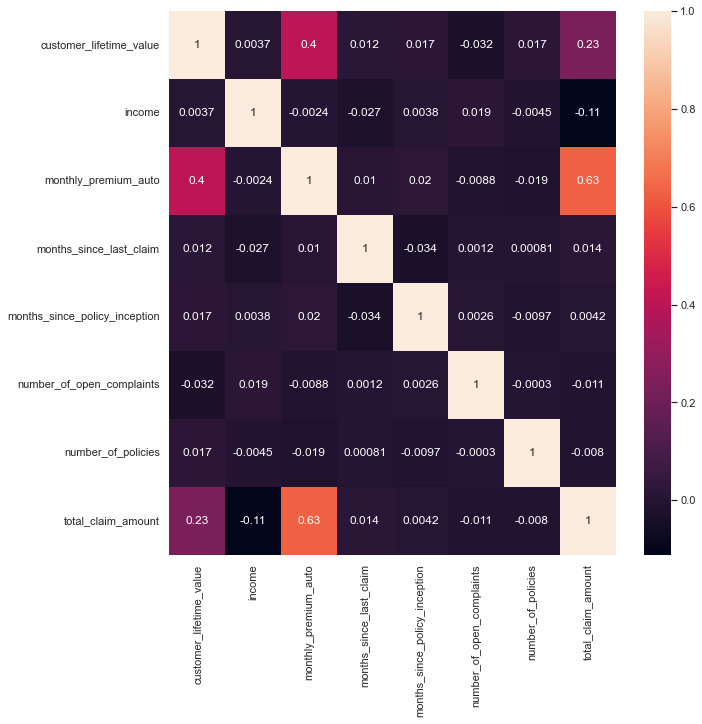

In [100]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(file.corr(),annot=True)

- Show a plot of the total number of responses.
- Show a plot of the response by the sales channel.
- Show a plot of the response by the total claim amount.
- Show a plot of the response by income.
- (Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature.
- Clean your notebook and make it a readable and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

In [101]:
categorical

region response  coverage education effective_to_date month  \
0          central       no     basic   college           2/18/11   feb   
1      west region       no     basic   college           1/18/11   jan   
2             east       no     basic  bachelor           2/10/11   feb   
3       north west      yes  extended   college           1/11/11   jan   
4       north west       no   premium  bachelor           1/17/11   jan   
...            ...      ...       ...       ...               ...   ...   
10684      central       no   premium  bachelor           1/19/11   jan   
10685   north west       no     basic   college            1/6/11   jan   
10686      central       no  extended  bachelor            2/6/11   feb   
10687  west region       no   premium   college           2/13/11   feb   
10688      central       no     basic  bachelor            1/8/11   jan   

      employment_status gender location_code marital_status     policy_type  \
0              employed      m      suburban        married  corporate auto   
1            unemployed      f      suburban         single   personal auto   
2              employed      m      suburban         single   personal auto   
3              employed      m      suburban         single  corporate auto   
4         medical leave      f      suburban        married   personal auto   
...                 ...    ...           ...            ...             ...   
10684        unemployed      f      suburban        married   personal auto   
10685          employed      f         urban        married   personal auto   
10686          employed      f         rural        married  corporate auto   
10687          employed      f         urban       divorced   personal auto   
10688        unemployed      m      suburban         single   personal auto   

             policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0      corporate l3           offer3         agent  four-door car      medsize  
1       personal l3           offer4   call center  four-door car      medsize  
2       personal l3           offer3   call center            suv      medsize  
3      corporate l3           offer2        branch  four-door car      medsize  
4       personal l2           offer1        branch  four-door car      medsize  
...             ...              ...           ...            ...          ...  
10684   personal l1           offer3           web     luxury car      medsize  
10685   personal l3           offer2        branch  four-door car      medsize  
10686  corporate l3           offer1           web     luxury suv      medsize  
10687   personal l1           offer1        branch            suv      medsize  
10688   personal l1           offer4           web            suv      medsize  

[10689 rows x 16 columns]

In [102]:
responses = categorical["response"].value_counts()

Text(0, 0.5, 'Count')

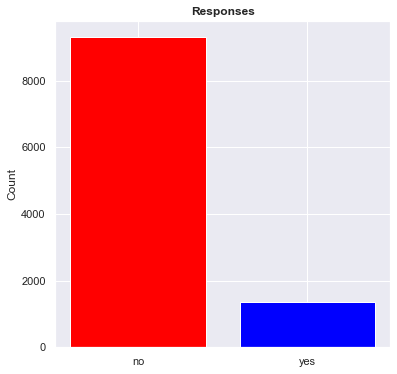

In [103]:
fig2, ax2 = plt.subplots(figsize = (6,6))
ax2.bar(responses.index,responses,color=("red","blue"))
plt.title('Responses', fontweight='bold')
plt.ylabel("Count")

In [104]:
categorical["sales_channel"].value_counts()

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Sales Channel', size='25', fontweight='bold')
sns.barplot(x = class_survival['class'],y = class_survival['survived'], hue = class_survival['alive'], palette=palette_alive)

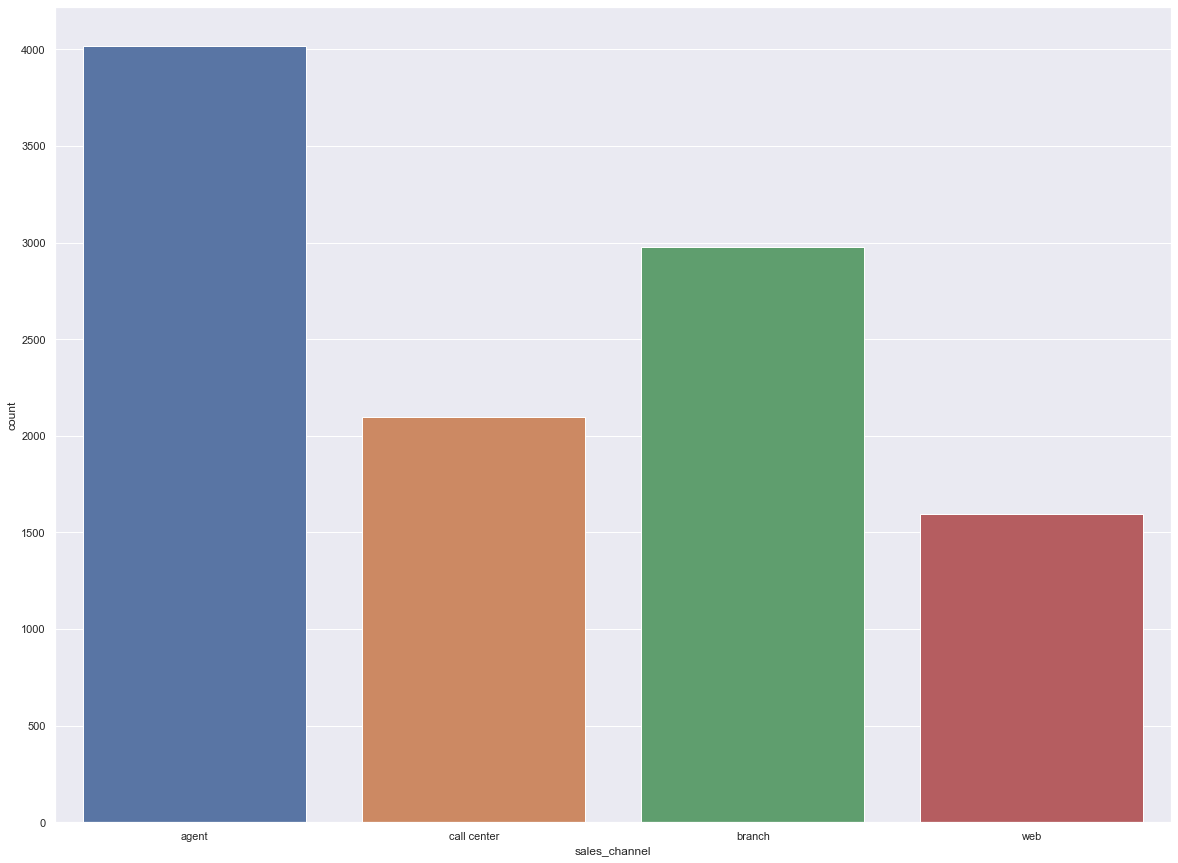

In [105]:
plt.figure(figsize=(20,15))
yas = sns.countplot(x="sales_channel", data=categorical)

In [106]:
enyas = categorical.groupby('sales_channel')['response'].count()
enyas

sales_channel
agent          4019
branch         2975
call center    2099
web            1596
Name: response, dtype: int64

<AxesSubplot:title={'center':'Response per Sales Channel'}, xlabel='sales_channel', ylabel='count'>

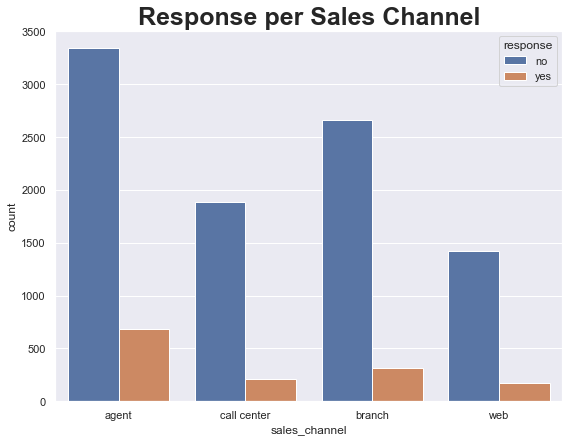

In [107]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Response per Sales Channel', size='25', fontweight='bold')

sns.countplot(data=file, x="sales_channel", hue="response")

<AxesSubplot:xlabel='income', ylabel='response'>

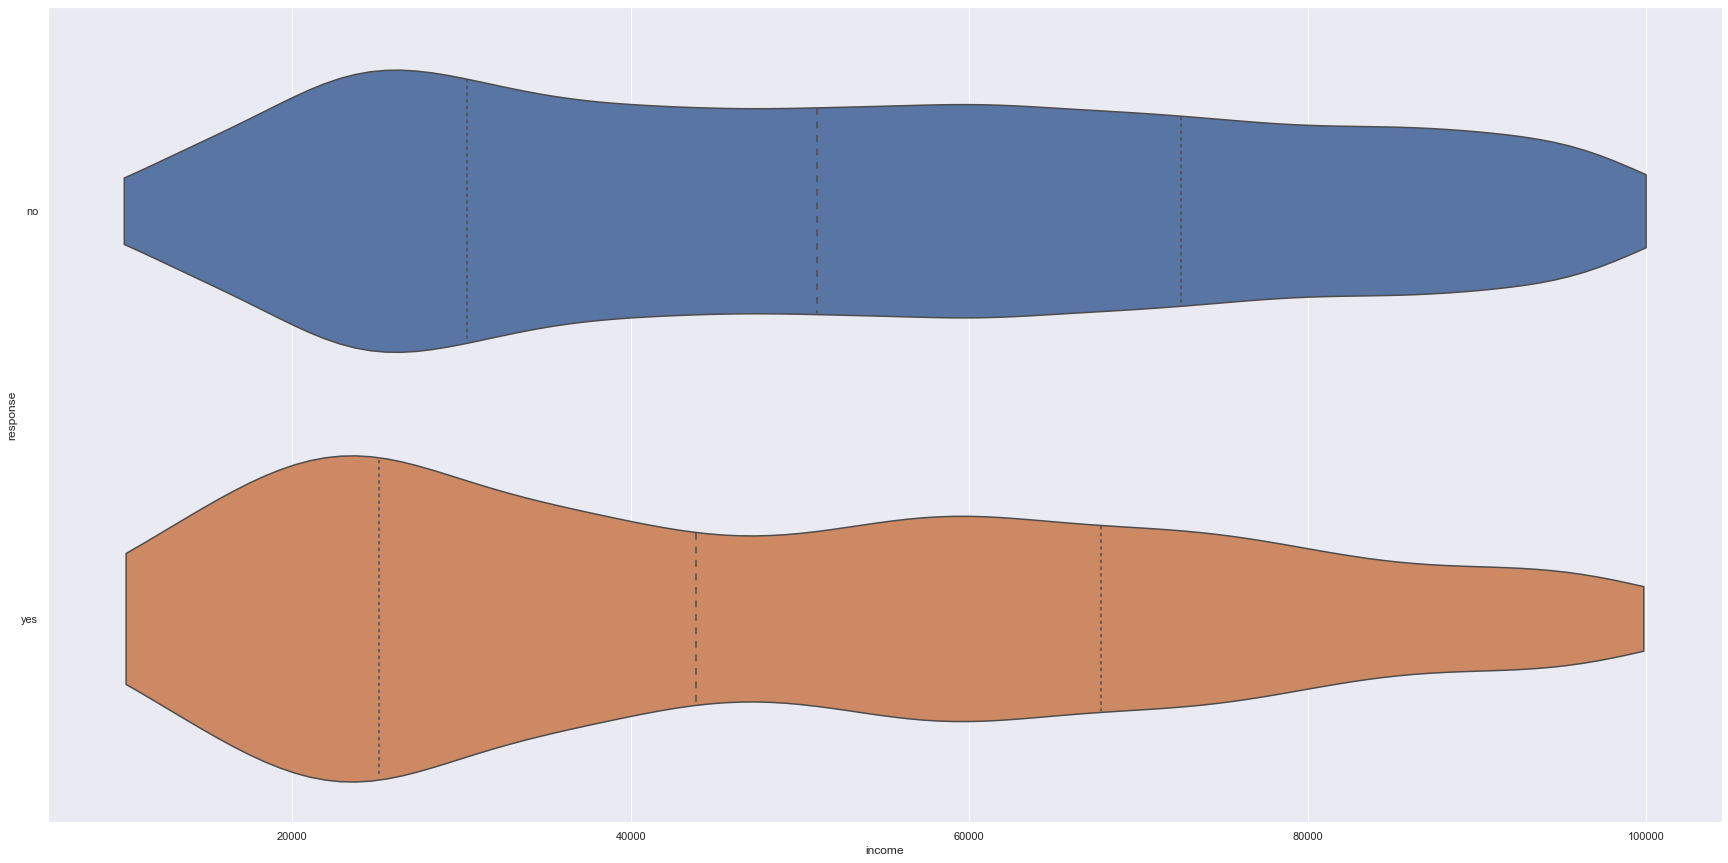

In [108]:
plt.figure(figsize=(30,15))
sns.violinplot(data=file, x="income", y="response", inner="quart", cut=0)

<AxesSubplot:xlabel='total_claim_amount', ylabel='response'>

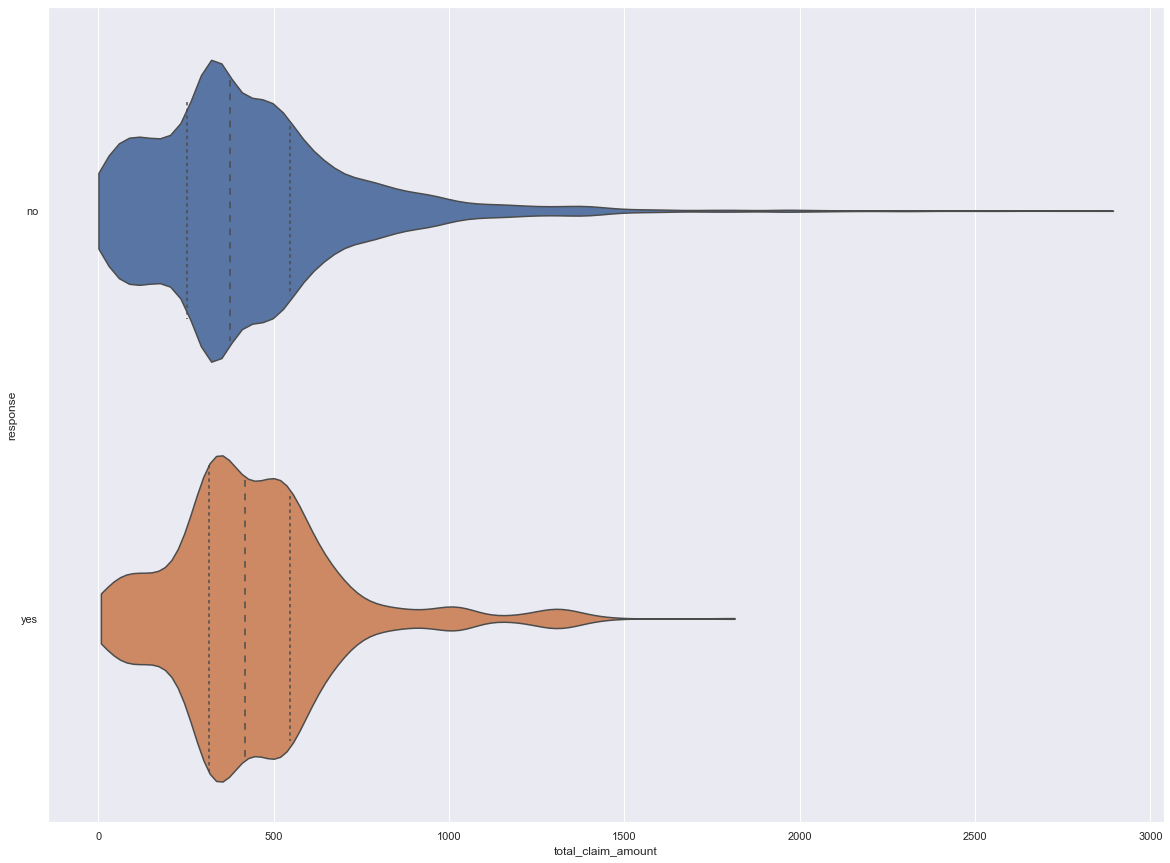

In [109]:
plt.figure(figsize=(20,15))
sns.violinplot(data=file, x="total_claim_amount", y="response", inner="quart", cut=0)